# Analysis #6: Extraction of LOTUS / OSK secondary structures from JPred4 prediction

- Author: Savandara BESSE & Leo BLONDEL
- Creation: 07-07-2017
- Last modification: 09-17-2019
    
### Required inputs
- '../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.LOTUS_domain.fasta'
- '../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.OSK_domain.fasta'

### Description
Generates the secondary structure prediction of the different LOTUS and OSK sequences within OSKAR sequences using JPred 4 algorithm. Makes the plots shown in Figure 3.

### Generated outputs
Available in `../Data/02_Oskar_analyses/2.6/`
- STRUCTURES/LOTUS_raw_structures.faa
- STRUCTURES/OSK_raw_structures.faa
- STRUCTURES/LOTUS_structures_alignment.fasta
- STRUCTURES/OSK_structures_alignment.fasta
- STRUCTURES/LOTUS_structures_alignment.trimmed_0.3.fasta
- STRUCTURES/OSK_structures_alignment.trimmed_0.3.fasta
- LOTUS_jpred_scores.csv
- OSK_jpred_scores.csv

In [2]:
LOTUS_alignement_file = '../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.LOTUS_domain.fasta'
OSK_alignment_file = '../Data/01_Oskar_identification/oskar_tracker_results/oskar_filtered.aligned.OSK_domain.fasta'


# Generating jpred API results
We need to split the sequences into jobs of 200 sequences max !

In [3]:
import jpredapi
from Bio import SeqIO
from Bio import Seq

In [4]:
email = 'lblondel@g.harvard.edu'

In [5]:
jpredapi.quota(email=email)

You haven't submitted any jobs today yet. If you certain you did submit some jobs - please check spelling of your email.



<Response [200]>

In [7]:
!mkdir tmp

In [8]:
# Reset the job csv file
f = open('../Data/02_Oskar_analyses/jpred_tmp/jobs.csv', 'w')
f.close()

In [9]:
def clean_seq(seq):
    tmp = ""
    for s in seq.seq:
        if s != '-':
            tmp += s
    seq.seq = Seq.Seq(tmp)
    return seq

def check_seq(seq):
    if len(seq) > 20 and len(seq) < 800:
        return True
    else:
        return False
    
def submit_seq(seq, domain):
    SeqIO.write(seq, './tmp/{}.fasta'.format(seq.name),'fasta')
    job = jpredapi.submit(
                            'single',
                            'fasta',
                            skipPDB=False,
                            file='./tmp/{}.fasta'.format(seq.name),
                            email=email,
                            name=domain
                            )
    jobid = job.text.split('cgi-bin/chklog?')[1].split('">')[0]
    return job, jobid, seq.name

def write_job_seq_table(jobs, domain):
    f = open('../Data/02_Oskar_analyses/jpred_tmp/jobs.csv', 'a')
    f.write('domain,job_id,seq_id')
    for job in jobs:
        f.write(','.join([domain, job[1], job[2]]) + '\n')
    f.close()

In [10]:
# Doing LOTUS
handle = SeqIO.parse(LOTUS_alignement_file, 'fasta')
seqs = [s for s in handle]
seqs = [clean_seq(seq) for seq in seqs]
seqs = [seq for seq in seqs if check_seq(seq)]
jobs = [submit_seq(seq, 'LOTUS_V3') for seq in seqs]
write_job_seq_table(jobs, 'LOTUS')

Your job will be submitted with the following parameters:
format: seq
skipPDB: off
file: ./tmp/GCPR01060865.1_1.fasta
email: lblondel@g.harvard.edu
name: LOTUS_V3
<h1>Created JPred job. Interactive access through:</h1><ul><li><a href="http://www.compbio.dundee.ac.uk/jpred4/cgi-bin/chklog?jp_aPmqocH">http://www.compbio.dundee.ac.uk/jpred4/cgi-bin/chklog?jp_aPmqocH</a></li></ul> Accepted
Your job will be submitted with the following parameters:
format: seq
skipPDB: off
file: ./tmp/GGLV01050081.1_1.fasta
email: lblondel@g.harvard.edu
name: LOTUS_V3
<h1>Created JPred job. Interactive access through:</h1><ul><li><a href="http://www.compbio.dundee.ac.uk/jpred4/cgi-bin/chklog?jp_0p98Dn8">http://www.compbio.dundee.ac.uk/jpred4/cgi-bin/chklog?jp_0p98Dn8</a></li></ul> Accepted
Your job will be submitted with the following parameters:
format: seq
skipPDB: off
file: ./tmp/GFCQ01023354.1_2.fasta
email: lblondel@g.harvard.edu
name: LOTUS_V3
<h1>Created JPred job. Interactive access through:</h1><ul>

In [11]:
done = []
to_check = jobs

In [12]:
while len(done) != len(jobs):
    for job in jobs:
        jobid = job[1]
        if jobid not in done:
            status = jpredapi.status(jobid=jobid)
            if 'finished' in status.text:
                jpredapi.get_results(jobid=jobid, results_dir_path='../Data/02_Oskar_analyses/jpred_tmp/', extract=True)
                done.append(jobid)

Your job status will be checked with the following parameters:
Job id: jp_aPmqocH
Get results: False
Job jp_aPmqocH finished. Results available at the following URL:
http://www.compbio.dundee.ac.uk/jpred4/results/jp_aPmqocH/jp_aPmqocH.results.html


Your job status will be checked with the following parameters:
Job id: jp_aPmqocH
Get results: True
Job jp_aPmqocH finished. Results available at the following URL:
http://www.compbio.dundee.ac.uk/jpred4/results/jp_aPmqocH/jp_aPmqocH.results.html


Saving results to: /home/xqua/Documents/Extavour/Projects/Project_Oskar_Evolution/Paper/Oskar_Orthologs/Data/02_Oskar_analyses/jpred_tmp/jp_aPmqocH
Your job status will be checked with the following parameters:
Job id: jp_0p98Dn8
Get results: False
Job jp_0p98Dn8 finished. Results available at the following URL:
http://www.compbio.dundee.ac.uk/jpred4/results/jp_0p98Dn8/jp_0p98Dn8.results.html


Your job status will be checked with the following parameters:
Job id: jp_0p98Dn8
Get results: True
Job

ReadError: unexpected end of data

In [42]:
# Doing OSK
handle = SeqIO.parse(OSK_alignment_file, 'fasta')
seqs = [s for s in handle]
seqs = [clean_seq(seq) for seq in seqs]
seqs = [seq for seq in seqs if check_seq(seq)]
jobs = [submit_seq(seq, 'OSK_V3') for seq in seqs]
write_job_seq_table(jobs, 'OSK')

Your job will be submitted with the following parameters:
format: seq
skipPDB: off
file: ./tmp/GCPR01060865.1_1.fasta
email: lblondel@g.harvard.edu
name: OSK_V3
<h1>Created JPred job. Interactive access through:</h1><ul><li><a href="http://www.compbio.dundee.ac.uk/jpred4/cgi-bin/chklog?jp_xWbAAik">http://www.compbio.dundee.ac.uk/jpred4/cgi-bin/chklog?jp_xWbAAik</a></li></ul> Accepted
Your job will be submitted with the following parameters:
format: seq
skipPDB: off
file: ./tmp/GGLV01050081.1_1.fasta
email: lblondel@g.harvard.edu
name: OSK_V3
<h1>Created JPred job. Interactive access through:</h1><ul><li><a href="http://www.compbio.dundee.ac.uk/jpred4/cgi-bin/chklog?jp_llhroBS">http://www.compbio.dundee.ac.uk/jpred4/cgi-bin/chklog?jp_llhroBS</a></li></ul> Accepted
Your job will be submitted with the following parameters:
format: seq
skipPDB: off
file: ./tmp/GFCQ01023354.1_2.fasta
email: lblondel@g.harvard.edu
name: OSK_V3
<h1>Created JPred job. Interactive access through:</h1><ul><li><a

In [43]:
done = []
to_check = jobs

In [46]:
done.append("jp_LGjlDXt")

In [47]:
while len(done) != len(jobs):
    for job in jobs:
        jobid = job[1]
        if jobid not in done:
            status = jpredapi.status(jobid=jobid)
            if 'finished' in status.text:
                jpredapi.get_results(jobid=jobid, results_dir_path='../Data/02_Oskar_analyses/jpred_tmp/', extract=True)
                done.append(jobid)

Your job status will be checked with the following parameters:
Job id: jp_4VuGDUd
Get results: False
Job jp_4VuGDUd finished. Results available at the following URL:
http://www.compbio.dundee.ac.uk/jpred4/results/jp_4VuGDUd/jp_4VuGDUd.results.html


Your job status will be checked with the following parameters:
Job id: jp_4VuGDUd
Get results: True
Job jp_4VuGDUd finished. Results available at the following URL:
http://www.compbio.dundee.ac.uk/jpred4/results/jp_4VuGDUd/jp_4VuGDUd.results.html


Saving results to: /home/xqua/Documents/Extavour/Projects/Project_Oskar_Evolution/Paper/Oskar_Orthologs/Data/02_Oskar_analyses/jpred_tmp/jp_4VuGDUd
Your job status will be checked with the following parameters:
Job id: jp_pU5FNAo
Get results: False
Job jp_pU5FNAo finished. Results available at the following URL:
http://www.compbio.dundee.ac.uk/jpred4/results/jp_pU5FNAo/jp_pU5FNAo.results.html


Your job status will be checked with the following parameters:
Job id: jp_pU5FNAo
Get results: True
Job

## Step 1: Create structure alignment and conf scores

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json, os, progressbar, requests, re, sys, time

from Bio.Seq import Seq
from Bio import AlignIO, SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_protein
from Bio.Align import MultipleSeqAlignment

import os 

data_path = '../Data/02_Oskar_analyses/'

%matplotlib inline

In [22]:
jobs = pd.read_csv(os.path.join('../Data/02_Oskar_analyses/jpred_tmp/', 'jobs.csv'))
jobs

,domain,job_id,seq_id
0,LOTUS,jp_S0NzXIy,GCPR01060865.1_1
1,LOTUS,jp_EL5jqXA,GGLV01050081.1_1
2,LOTUS,jp_VvOXqSm,GFCQ01023354.1_2
3,LOTUS,jp_RQQDixE,g73831.t1
4,LOTUS,jp_zsX0rJK,GDYE01076282.1_2
...,...,...,...
753,OSK,jp_Eye4IDB,GFQQ01016007.1_6
754,OSK,jp__5iUNmm,GAVM02025082.1_3
755,OSK,jp_S_EiSN7,GASS02003776.1_4
756,OSK,jp_Ksei5Tr,g37762.t1


In [23]:
def collect_scores(RES_PATH):
    results = {
        "OSK": {},
        "LOTUS": {}
    }
    jobs = pd.read_csv(os.path.join(RES_PATH, 'jobs.csv'))
    
    for jobid in [job for job in os.listdir(RES_PATH) if 'jp_' in job and job in jobs['job_id'].values]:
        files = os.listdir(os.path.join(RES_PATH, jobid))
#         domain = [file.split('_')[0] for file in files if ".name" in file][0]
        
        handle = SeqIO.parse(os.path.join(RES_PATH, jobid, jobid + '.seq'), 'fasta')
        seq = [s for s in handle][0]
        
        domain = jobs[(jobs['job_id'] == jobid)]['domain'].values[0]
        
        name = jobs[(jobs['domain'] == domain) & (jobs['job_id'] == jobid)]['seq_id'].values[0]
        
        f = open(os.path.join(RES_PATH, jobid, jobid + '.jnet'))
        for line in f.readlines():
            if "jnetpred:" in line:
                structure = ''.join([i for i in line.replace('jnetpred:','').strip('\n').split(',') if i])
            if "JNETCONF:" in line:
                score = ''.join([i for i in line.replace('JNETCONF:','').strip('\n').split(',') if i])
        
        results[domain][name] = { 
            "structure": structure,
            "score": score,
            "sequence": seq.seq
        }
        
    return results

In [24]:
results = collect_scores('../Data/02_Oskar_analyses/jpred_tmp/')

## Step 2 : Save structure alignments and confidence scores from JPRED4 raw results

In [25]:
def save_structure_sequences(results, outputFile):
    my_sequences = []
    for key in results:
        seq = SeqRecord(Seq(results[key]['structure'], generic_protein), description='Jpred4 Structure Prediction', id=key, name=key)
        my_sequences.append(seq)
    SeqIO.write(my_sequences, outputFile, "fasta")

def save_jpred_scores(results, outputFile):
    output = open(outputFile,'w')
    for key in results:
        output.write(",".join([key] + list(results[key]['score'])) + '\n')
    output.close()

In [26]:
save_structure_sequences(results['LOTUS'], os.path.join(data_path, '2.6/STRUCTURES/LOTUS_raw_structures.faa'))
save_structure_sequences(results['OSK'], os.path.join(data_path, '2.6/STRUCTURES/OSK_raw_structures.faa'))
save_jpred_scores(results['LOTUS'], os.path.join(data_path, '2.6/LOTUS_jpred_scores.csv'))
save_jpred_scores(results['OSK'], os.path.join(data_path, '2.6/OSK_jpred_scores.csv'))

## Step 3: Create structure alignment

In [50]:
def alignment_table(fastaFile):
    alignment = AlignIO.read(open(fastaFile), 'fasta')
    length = alignment.get_alignment_length()
    records = list(SeqIO.parse(fastaFile, 'fasta'))
    ID = [record.id for record in records]
    seq = [str(record.seq) for record in records]
    description = [record.description for record in records]
    description = [descr.split('|') for descr in description]
    description = [descr[len(descr)-1] for descr in description]
    seqInfos = [ID, description, seq]
    ALGN_DF = pd.DataFrame(data=seqInfos).T
    ALGN_DF.columns = ['ID', 'Description','Sequence']
    return ALGN_DF, length

def structure_table(structureFile):
    records = list(SeqIO.parse(structureFile, 'fasta'))
    ID = [ record.id for record in records]
    seq = [str(record.seq) for record in records]
    strInfos = [ID, seq]
    STR_DF = pd.DataFrame(data=strInfos).T
    STR_DF.columns = ['ID','Sequence']
    return STR_DF

def get_position(alignment_mapping, ID, position):
    if position in alignment_mapping[ID]:
        return alignment_mapping[ID].index(position)

def save_structure_alignment(alignment_structure, outputFile):
    records = []
    for key in alignment_structure.keys():
        records.append(SeqRecord(Seq(alignment_structure[key], generic_protein), id=key))
    alignment = MultipleSeqAlignment(records)
    AlignIO.write(alignment, outputFile, 'fasta')
    
def build_score_table(jpredFile, ALGN_DF, length):
    jpred_scores = open(jpredFile)
    allLines = [line for line in jpred_scores.readlines()]
    conf_list = {}
    for line in allLines :
        line = line.strip('\n').split(',')
        name = line[0]
        conf = line[1:]
        conf_list[name] = conf
        
    scores_matrix = {}
    for ID in conf_list.keys() :
        if ID in ALGN_DF['ID'].values:
            name = ID
            List = []
            for i in range(length):
                indice = get_position(alignment_mapping, name,i)
                if  indice :
                    List.append(int(conf_list[ID][indice]))
                else :
                    List.append(float('Nan'))
            scores_matrix[name] = List
    DF = pd.DataFrame.from_dict(scores_matrix).T
    DF = DF.fillna(0)
    
    Scores = []
    Prediction = []
    for column in DF.columns:
        score = sum(DF[column])/len(DF.index)
        Scores.append(score)
    SCORES_DF = pd.DataFrame(Scores,columns=['JPRED_scores'])
    return SCORES_DF

In [55]:
LOTUS_structureFile = os.path.join(data_path, '2.6/STRUCTURES/LOTUS_raw_structures.faa')
ALGN_DF, length = alignment_table(LOTUS_alignement_file)
STR_DF = structure_table(LOTUS_structureFile)

### Identify aa index for each sequence in LOTUS alignment
alignment_mapping = {}
for index in ALGN_DF.index:
    name = ALGN_DF['ID'][index]
    List = []
    cpt = 0
    for i in ALGN_DF['Sequence'][index]:
        if i != '-':
            List.append(cpt)
        cpt += 1
    alignment_mapping[name] = List
    
### Create structure alignment based on indexed positions of the alignment
alignment_structure = {}
for index in STR_DF.index:
    
    if STR_DF['ID'][index] in ALGN_DF['ID'].values:
        name = str(STR_DF['ID'][index])
#         print(name)
        List = []
        for i in range(length):
            indice = get_position(alignment_mapping, name, i)
            if indice :
                List.append(STR_DF['Sequence'][index][indice].replace('-','X'))
            else:
                List.append('-')
        alignment_structure[name] = ''.join(List)
    else:
        print(STR_DF['ID'][index])
        
LOTUS_jpredFile = os.path.join(data_path, '2.6/LOTUS_jpred_scores.csv')        
save_structure_alignment(alignment_structure, os.path.join(data_path, '2.6/STRUCTURES/LOTUS_structures_alignment.fasta'))
LOTUS_JPRED_SCORES = build_score_table(LOTUS_jpredFile, ALGN_DF, length)

In [56]:
OSK_structureFile = os.path.join(data_path, '2.6/STRUCTURES/OSK_raw_structures.faa')
ALGN_DF, length = alignment_table(OSK_alignment_file)
STR_DF = structure_table(OSK_structureFile)

### Identify aa index for each sequence in OSK alignment
alignment_mapping = {}
for index in ALGN_DF.index:
    name = ALGN_DF['ID'][index]
    List = []
    cpt = 0
    for i in ALGN_DF['Sequence'][index]:
        if i != '-':
            List.append(cpt)
        cpt += 1
    alignment_mapping[name] = List
    
### Create structure alignment based on indexed positions of the alignment
alignment_structure = {}
for index in STR_DF.index:
#     print(STR_DF['ID'][index])
    if STR_DF['ID'][index] in ALGN_DF['ID'].values:
        name = str(STR_DF['ID'][index])
#         print(name)
        List = []
        for i in range(length):
            indice = get_position(alignment_mapping, name, i)
            if  indice :
                List.append(STR_DF['Sequence'][index][indice].replace('-','X'))
            else :
                 List.append('-')
        alignment_structure[name] = ''.join(List)
        
OSK_jpredFile = os.path.join(data_path, '2.6/OSK_jpred_scores.csv')        
save_structure_alignment(alignment_structure, os.path.join(data_path, '2.6/STRUCTURES/OSK_structures_alignment.fasta'))
OSK_JPRED_SCORES = build_score_table(OSK_jpredFile, ALGN_DF, length)

#### Structure confidence score for LOTUS

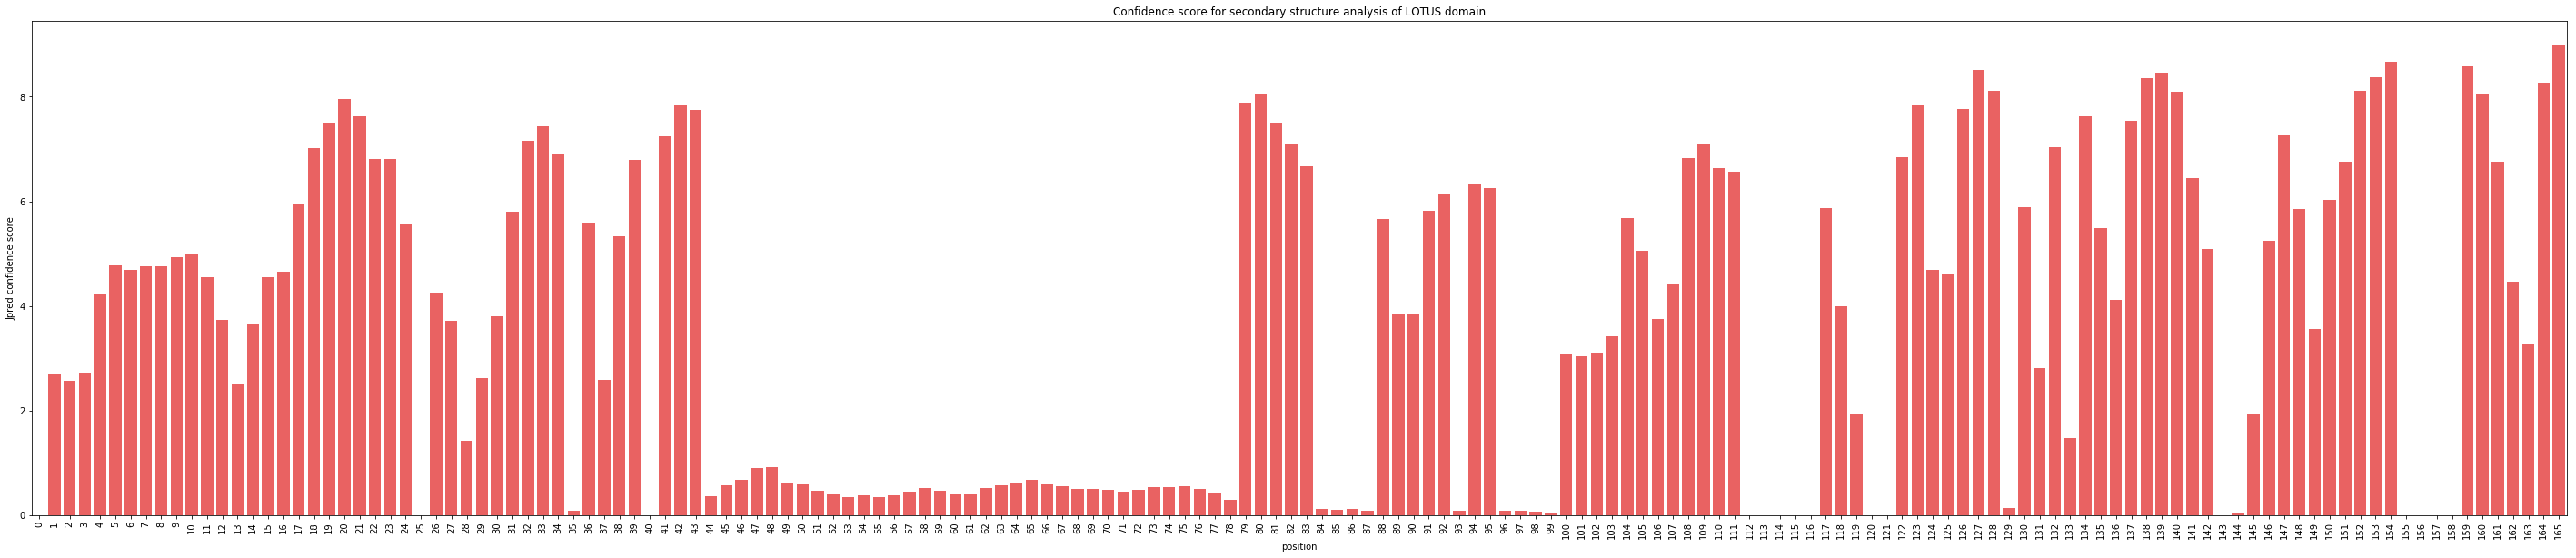

In [33]:
fig = plt.figure(figsize=(50,10))
g = sns.barplot(y='JPRED_scores', x=LOTUS_JPRED_SCORES.index, data=LOTUS_JPRED_SCORES, color='#ff4c4c')
for item in g.get_xticklabels():
    item.set_rotation(90)
    
plt.ylabel('Jpred confidence score')
plt.xlabel('position')
plt.title('Confidence score for secondary structure analysis of LOTUS domain')
plt.show()

#### Structure confidence score for OSK

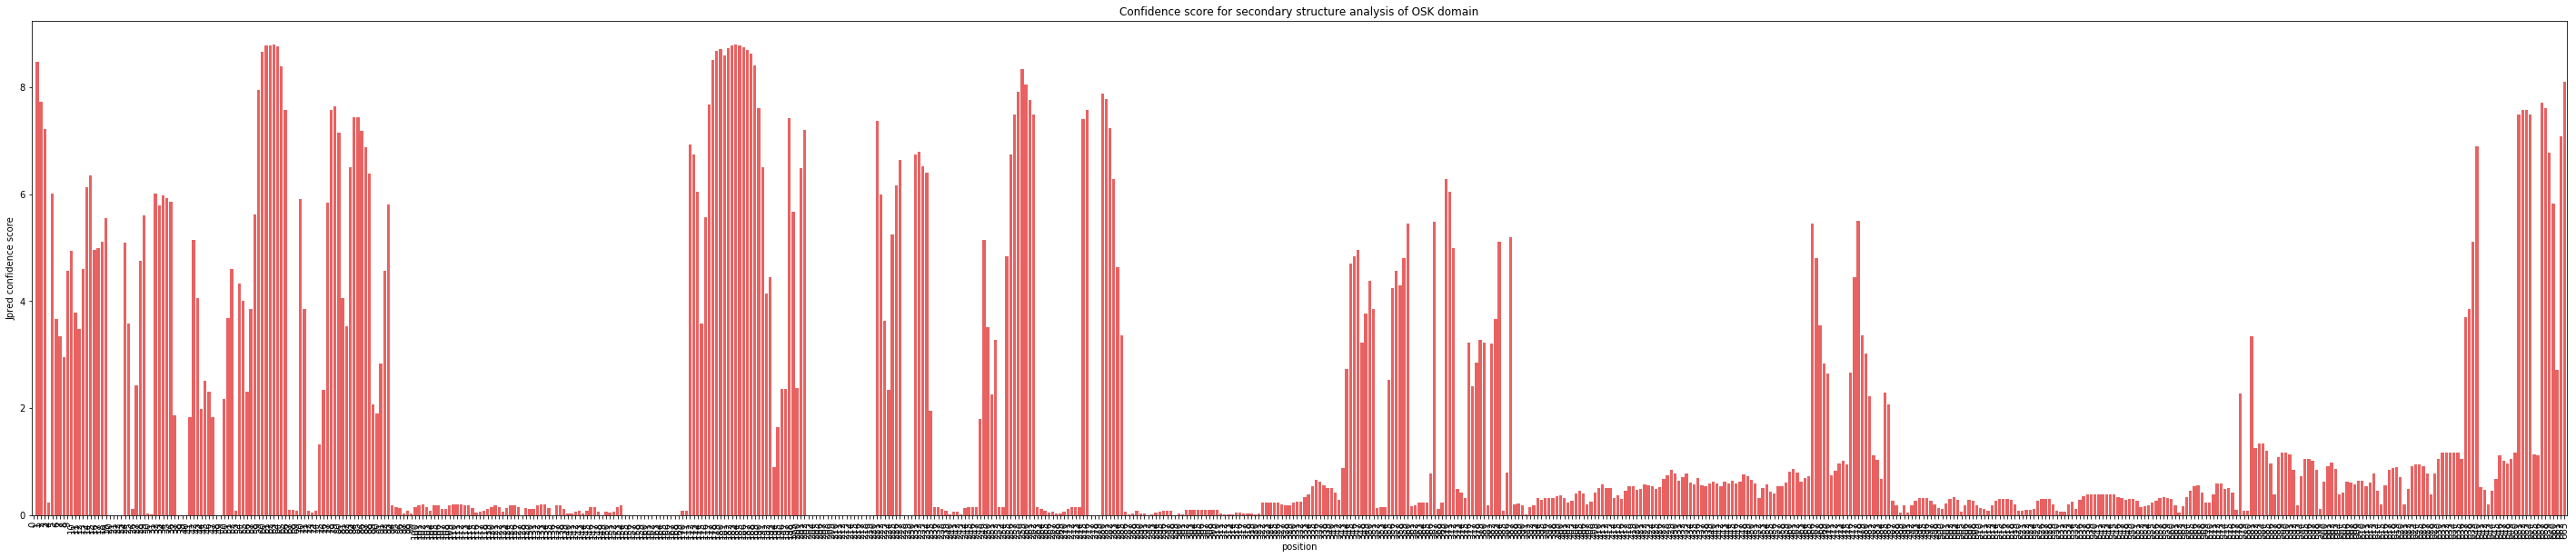

In [34]:
fig = plt.figure(figsize=(50,10))
g = sns.barplot(y='JPRED_scores', x=OSK_JPRED_SCORES.index, data=OSK_JPRED_SCORES, color='#ff4c4c')
for item in g.get_xticklabels():
    item.set_rotation(90)
    
plt.ylabel('Jpred confidence score')
plt.xlabel('position')
plt.title('Confidence score for secondary structure analysis of OSK domain')
plt.show()

# Step 5. Trim Alignments

In [59]:
!trimal -in ../Data/02_Oskar_analyses/2.6/STRUCTURES/LOTUS_structures_alignment.fasta -out ../Data/02_Oskar_analyses/2.6/STRUCTURES/LOTUS_structures_alignment.trimmed_0.3.fasta -gt 0.3 -fasta -keepheader

In [ ]:
!trimal -in ../Data/02_Oskar_analyses/2.6/STRUCTURES/OSK_structures_alignment.fasta -out ../Data/02_Oskar_analyses/2.6/STRUCTURES/OSK_structures_alignment.trimmed_0.3.fasta -gt 0.3 -fasta -keepheader

# Step 5 Create Logos

In [88]:
import weblogo
from IPython.display import Image 

In [89]:
scheme = weblogo.ColorScheme(
        [
            weblogo.SymbolColor("H", "#B9191E"),
            weblogo.SymbolColor("E", "#2F4293"),
            weblogo.SymbolColor("X", "#333333"),
        ],
)

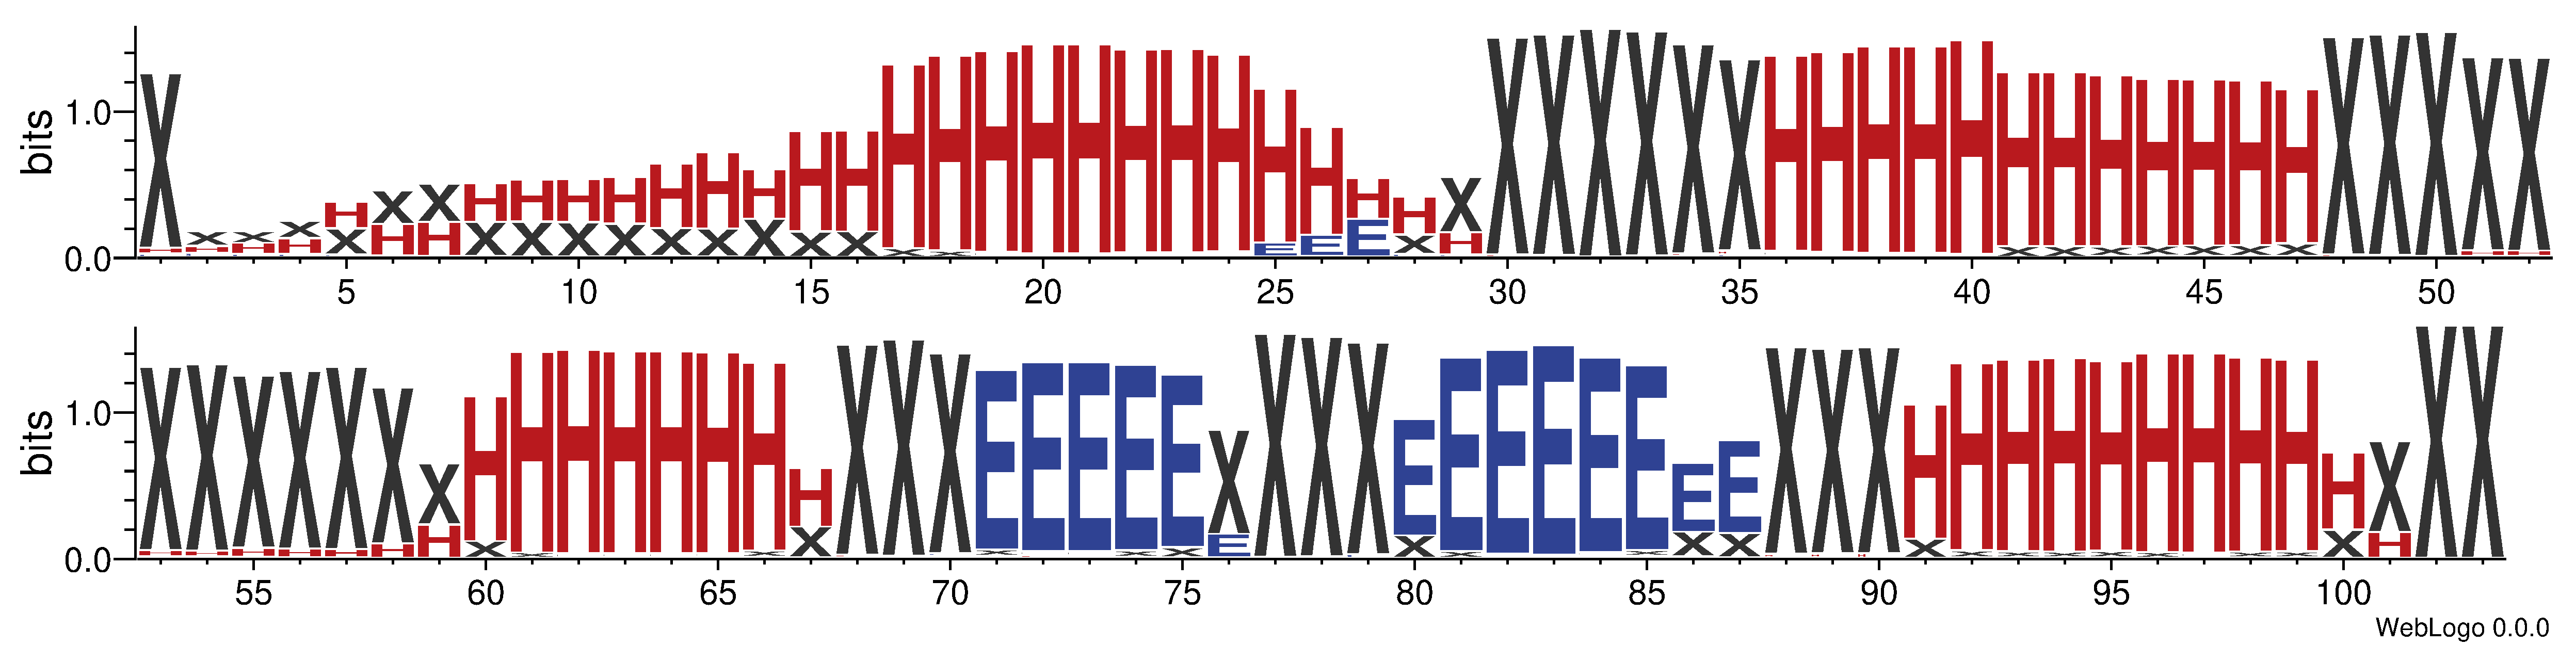

In [90]:
title = "LOTUS"
fasta_file = "../Data/02_Oskar_analyses/2.6/STRUCTURES/LOTUS_structures_alignment.trimmed_0.3.fasta"
outpath = '../Figures/RAW/LOTUS_Structure_logo.png'
f = open(fasta_file)
seqs = weblogo.read_seq_data(f, alphabet=['H','E','X'])
logodata = weblogo.LogoData.from_seqs(seqs)
logooptions = weblogo.LogoOptions()
logooptions.title = title
logooptions.stacks_per_line = 52
logooptions.scale_width = False
logooptions.color_scheme = scheme
logoformat = weblogo.LogoFormat(logodata, logooptions)
png = weblogo.png_print_formatter(logodata, logoformat)
f = open(outpath, 'wb')
f.write(png)
f.close()
display(Image(png))

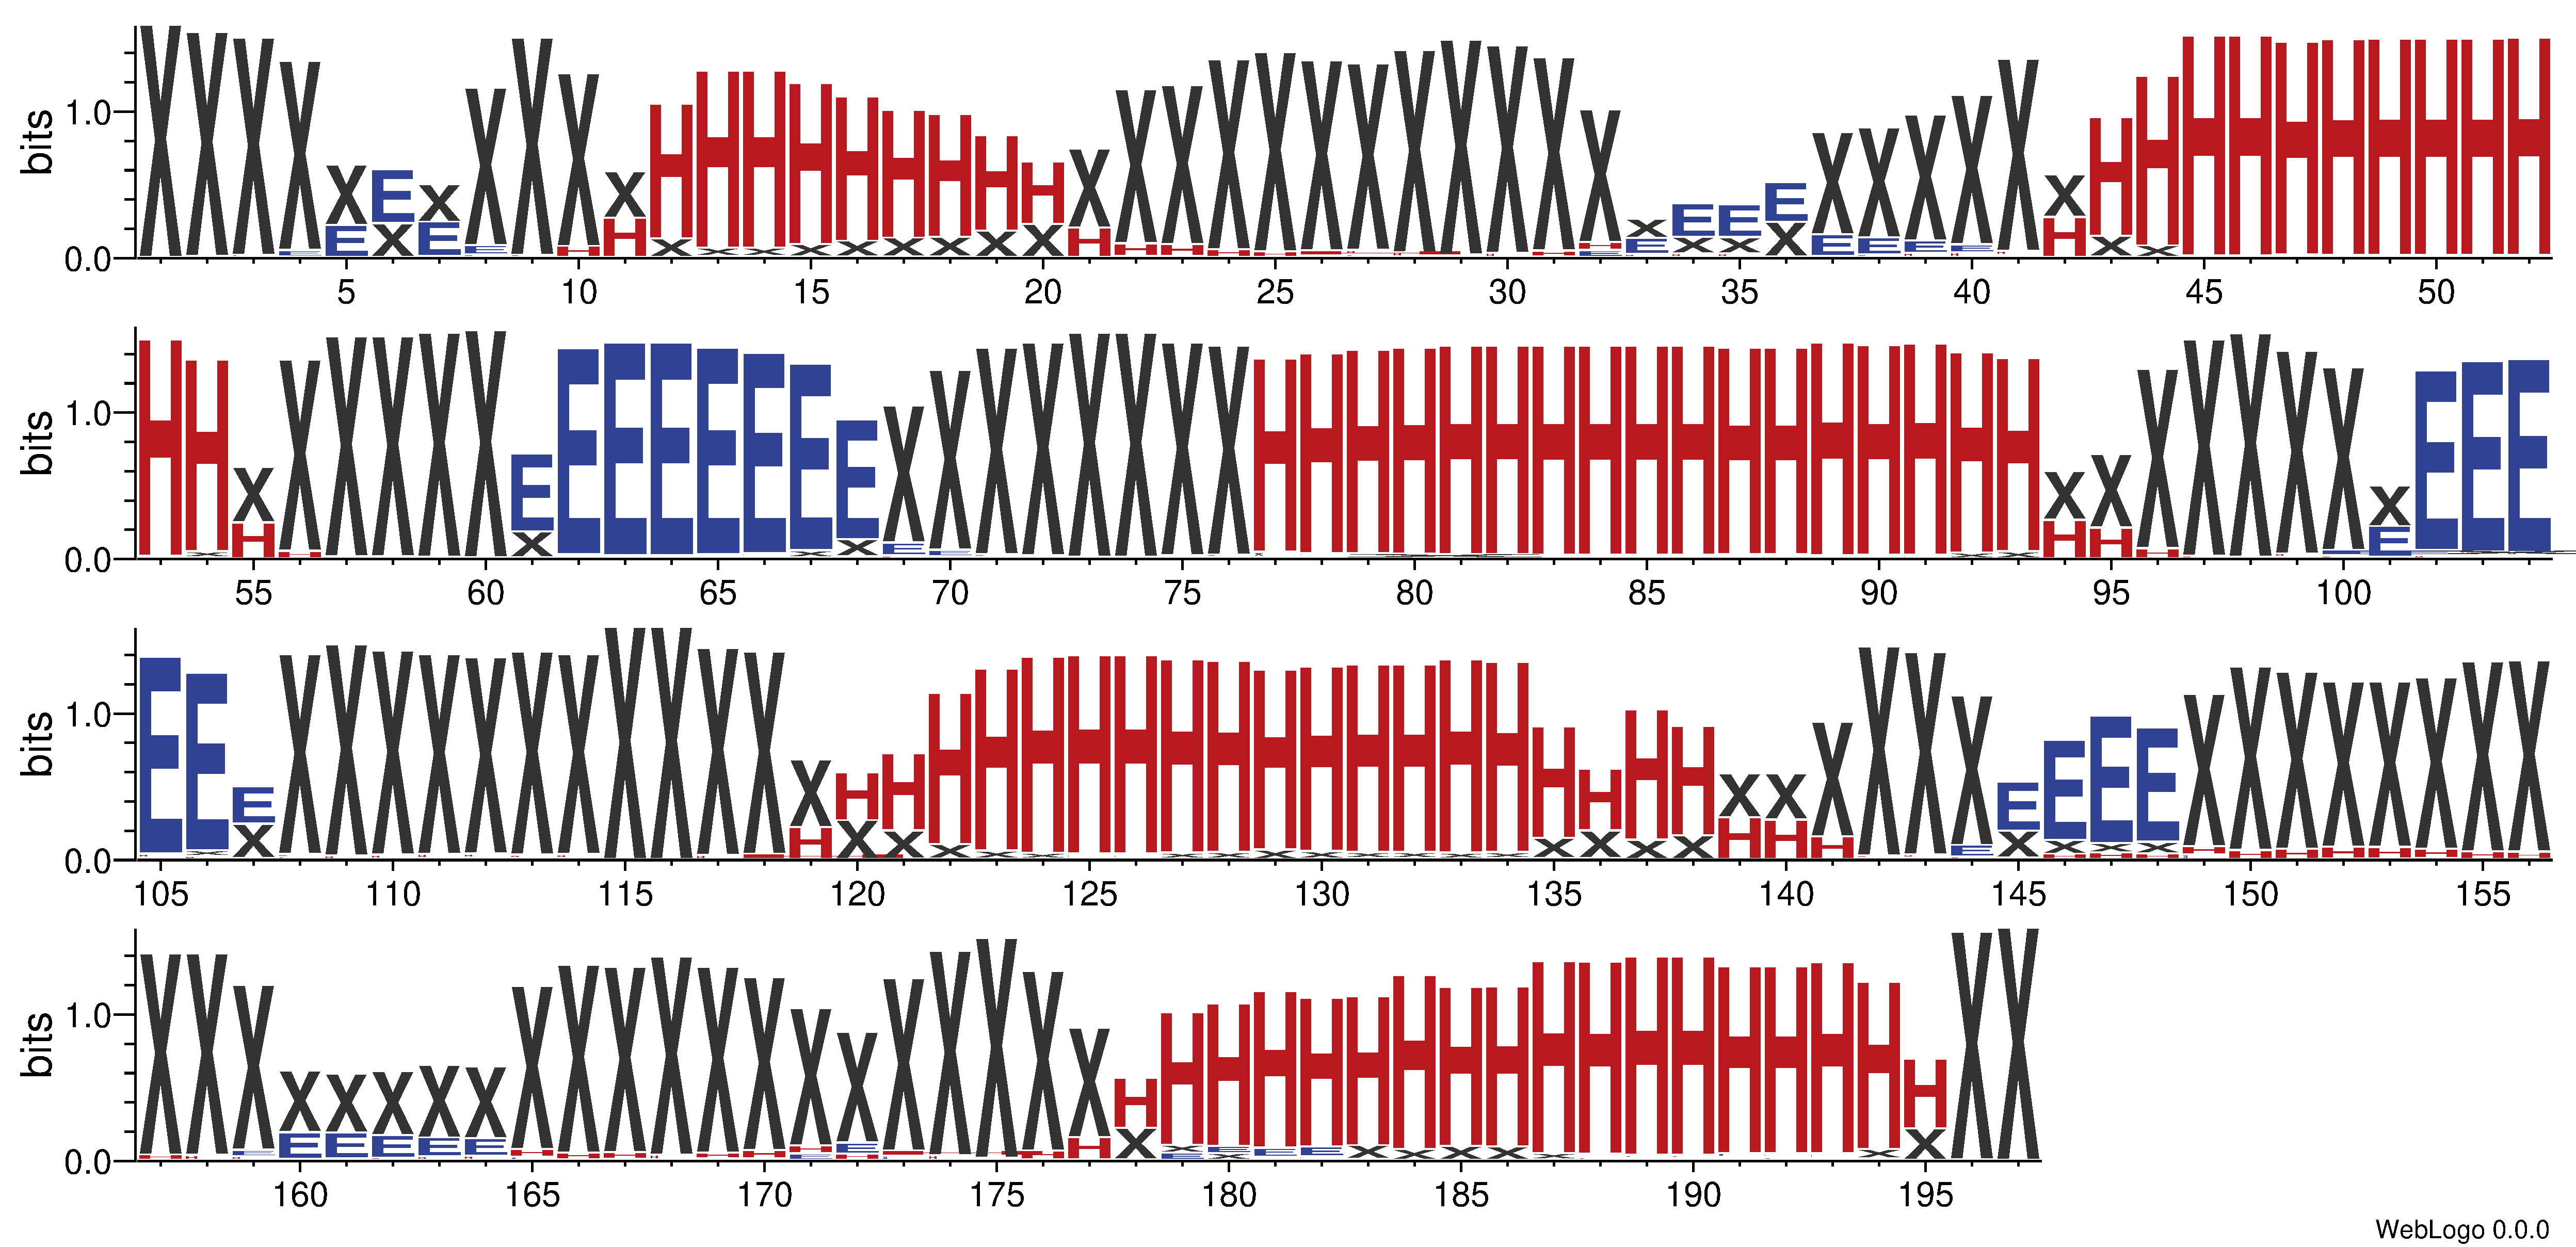

In [91]:
title = "OSK"
fasta_file = "../Data/02_Oskar_analyses/2.6/STRUCTURES/OSK_structures_alignment.trimmed_0.3.fasta"
outpath = '../Figures/RAW/OSK_Structure_logo.png'
f = open(fasta_file)
seqs = weblogo.read_seq_data(f, alphabet=['H','E','X'])
logodata = weblogo.LogoData.from_seqs(seqs)
logooptions = weblogo.LogoOptions()
logooptions.title = title
logooptions.stacks_per_line = 52
logooptions.scale_width = False
logooptions.color_scheme = scheme
logoformat = weblogo.LogoFormat(logodata, logooptions)
png = weblogo.png_print_formatter(logodata, logoformat)
f = open(outpath, 'wb')
f.write(png)
f.close()
display(Image(png))